In [1]:
#from google.colab import drive

#drive.mount("/content/gdrive")

Mounted at /content/gdrive


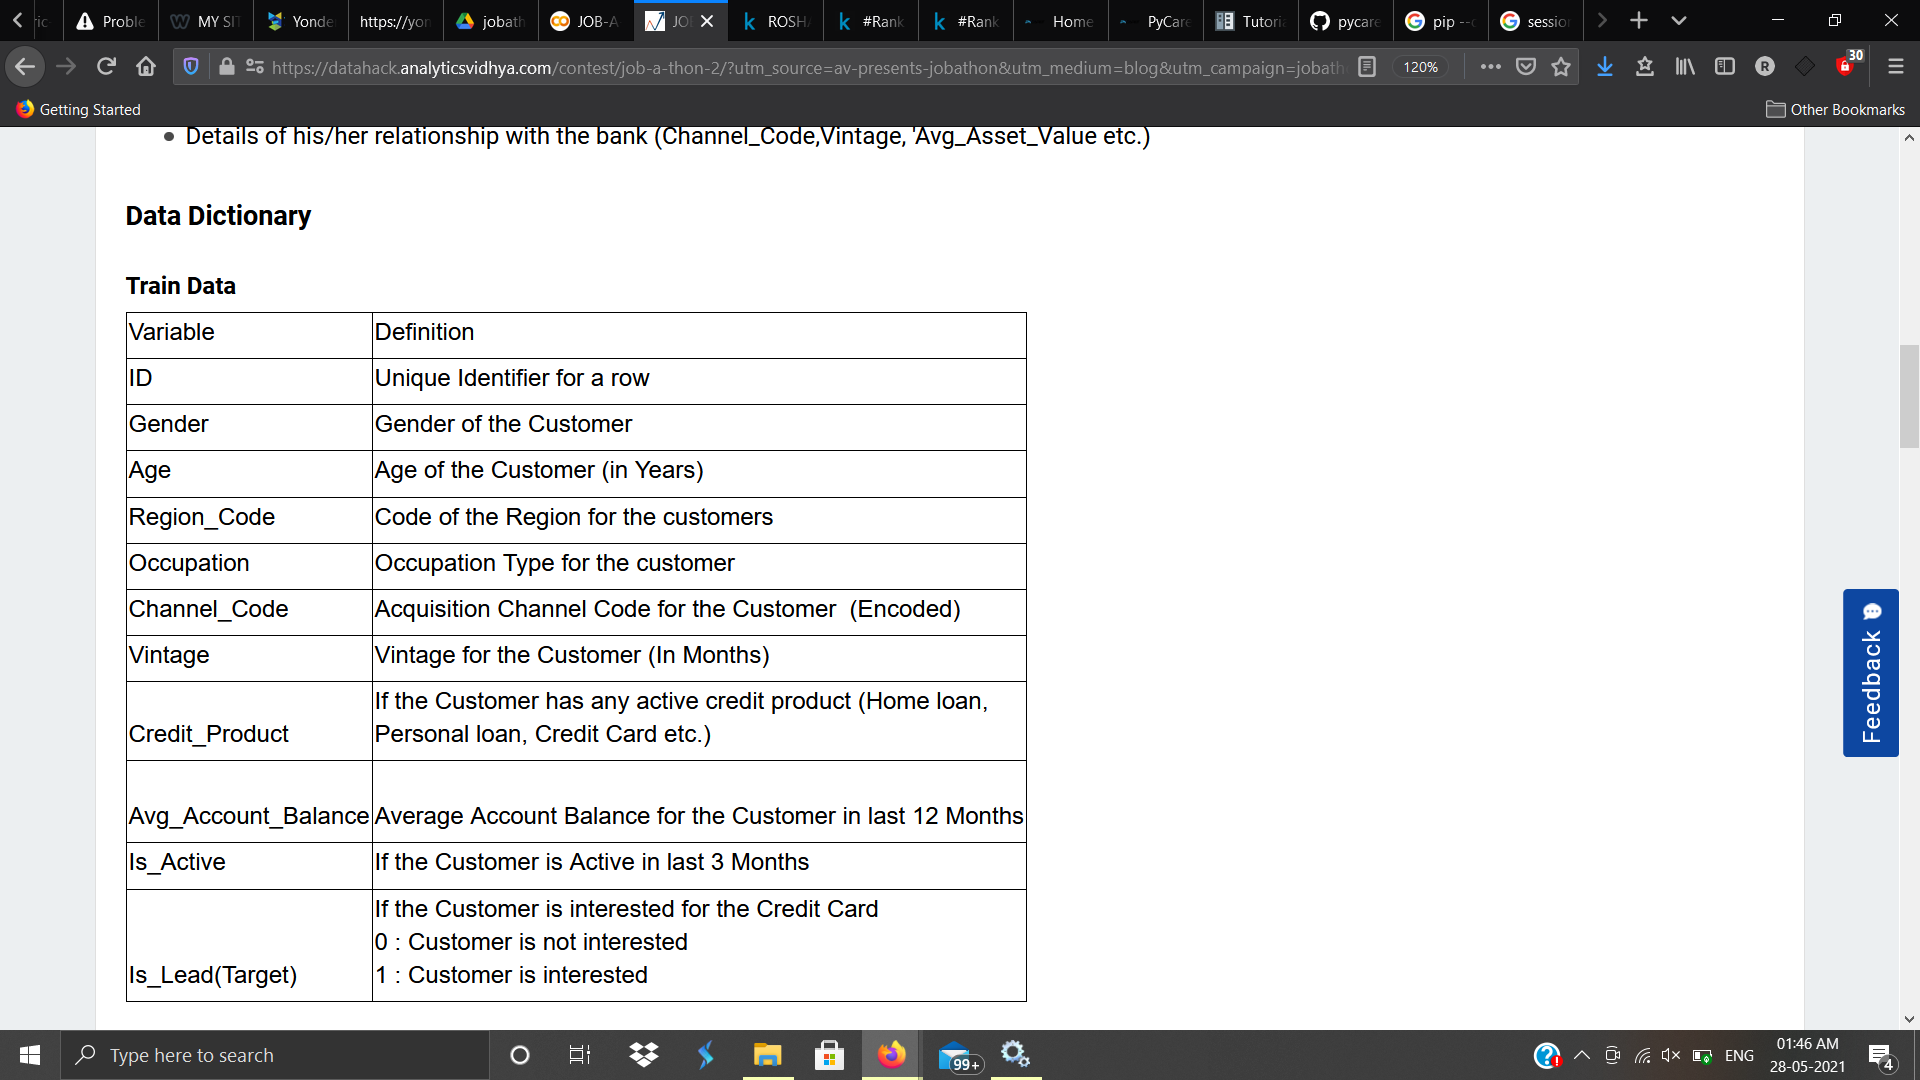

In [18]:

import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import KBinsDiscretizer

# Imports

In [113]:
import pandas as pd

train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')
sample = pd.read_csv('sample_submission_eyYijxG.csv')


# Sanity Check

In [3]:
train.head(5).append(train.tail(5))

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [4]:
print("Train length ===>  ", len(train))
print("Test length  ===>  ", len(test))


Train length ===>   245725
Test length  ===>   105312


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [7]:
print(train.isnull().sum())
print("--------------------------------- Test")
print(test.isnull().sum())


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64
--------------------------------- Test
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


In [8]:
print("Total length of data ==> " + str(len(train)),"||  Unique records ==> "+ str(train['ID'].nunique()))
print("Similar records in train and test ==> ", test['ID'].isin(train['ID']).sum())

Total length of data ==> 245725 ||  Unique records ==> 245725
Similar records in train and test ==>  0


In [9]:
(train['Is_Lead'].value_counts()/ len(train)) * 100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

In [47]:
pd.crosstab(train['Gender'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Gender,,
Male,0.734845,0.265155
Female,0.796419,0.203581


In [48]:
pd.crosstab(train['Credit_Product'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Credit_Product,,
Yes,0.685049,0.314951
No,0.795039,0.204961


In [49]:
pd.crosstab(train['Age'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Age,,
51,0.621503,0.378497
50,0.623167,0.376833
54,0.625753,0.374247
48,0.628106,0.371894
47,0.630804,0.369196
...,...,...
25,0.930846,0.069154
26,0.934617,0.065383
27,0.936794,0.063206


In [50]:
pd.crosstab(train['Occupation'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Occupation,,
Entrepreneur,0.339333,0.660667
Self_Employed,0.724035,0.275965
Other,0.755048,0.244952
Salaried,0.840331,0.159669


In [51]:
pd.crosstab(train['Is_Active'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Is_Active,,
Yes,0.717033,0.282967
No,0.791849,0.208151


In [52]:
pd.crosstab(train['Channel_Code'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Channel_Code,,
X3,0.632975,0.367025
X2,0.672105,0.327895
X4,0.752200,0.247800
X1,0.908579,0.091421


In [53]:
pd.crosstab(train['Vintage'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Vintage,,
91,0.480234,0.519766
93,0.487482,0.512518
98,0.490218,0.509782
87,0.494260,0.505740
92,0.495362,0.504638
...,...,...
20,0.857380,0.142620
15,0.857785,0.142215
31,0.869543,0.130457


In [56]:
pd.crosstab(train['Channel_Code'], train.Is_Lead, normalize = 'index').sort_values(by = [1], ascending = False)

Is_Lead,0,1
Channel_Code,,
X3,0.632975,0.367025
X2,0.672105,0.327895
X4,0.752200,0.247800
X1,0.908579,0.091421


In [9]:
df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,is_train
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0,1045696,No,0,1
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0,581988,No,0,1


# Label Encoding

In [114]:


le = LabelEncoder()

train['is_train'] = 1               
test['is_train'] = 0
test['Is_Lead'] = None
df = pd.concat((train,test)).reset_index(drop = True)

print(len(df))
#Imputation of nan values with -1
df['Credit_Product'] = df['Credit_Product'].replace({'Yes':1,'No':0,np.nan:-1})

#Label encoding
df['Gender'] = le.fit_transform(df['Gender'])
df['Region_Code'] = le.fit_transform(df['Region_Code'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Channel_Code'] = le.fit_transform(df['Channel_Code'])
df['Is_Active'] = le.fit_transform(df['Is_Active'])
df['Credit_Product'] = le.fit_transform(df['Credit_Product'])




#creating frequency features
def frequency_encoding(column_name,output_column_name,df):
    fe_pol = (df.groupby(column_name).size()) / len(df)
    df[output_column_name] = df[column_name].apply(lambda x : fe_pol[x])
    
    
    
#df['mean_acc_region'] = df.groupby(['Age'])['Avg_Account_Balance'].transform('mean')
#df['sum_acc_region'] =df.groupby(['Age'])['Avg_Account_Balance'].transform('sum')
#df['max_acc_region'] =df.groupby(['Age'])['Avg_Account_Balance'].transform('max')
#df['mean_acc_Is_Active'] =df.groupby(['Is_Active','Occupation'])['Avg_Account_Balance'].transform('mean')



351037


In [65]:
#from sklearn.preprocessing import KBinsDiscretizer

#Lower_Age_Bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
#df['Age_Bins'] = Lower_Age_Bins.fit_transform(df['Age'].values.reshape(-1,1)).astype(int)
#df.head(2)

In [137]:

    
frequency_encoding('Gender','Gender_fe',df)
frequency_encoding('Credit_Product','Credit_Product_fe',df)
frequency_encoding('Region_Code','Region_Code_fe',df)
frequency_encoding('Occupation','Occupation_fe',df)
frequency_encoding('Channel_Code','Channel_Code_fe',df)
frequency_encoding('Is_Active','Is_Active_fe',df)



In [ ]:
#df['R_code_vintage_mean'] = df.groupby(['Region_Code','Vintage'])['Avg_Account_Balance'].transform('mean') 
#df['R_code_vintage_sum'] = df.groupby(['Region_Code','Vintage'])['Avg_Account_Balance'].transform('sum')
#df['R_code_vintage_min'] = df.groupby(['Region_Code','Vintage'])['Avg_Account_Balance'].transform('min')
#df['R_code_vintage_max'] = df.groupby(['Region_Code','Vintage'])['Avg_Account_Balance'].transform('max')

In [138]:
df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,is_train,Gender_fe,Credit_Product_fe,Region_Code_fe,Occupation_fe,Channel_Code_fe,Is_Active_fe
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0,0,1,0.453328,0.586733,0.145452,0.285736,0.279119,0.60987
1,IDD62UNG,0,30,27,2,0,32,1,581988,0,0,1,0.453328,0.586733,0.052479,0.293166,0.422183,0.60987


In [139]:
train = df[df['is_train']==1]                             
test = df[df['is_train']==0]
train = train.drop(['ID','is_train'],axis=1)              
test = test.drop(['ID','is_train','Is_Lead'] ,axis=1)

print(train.head())
test.head()

   Gender  Age  Region_Code  Occupation  ...  Region_Code_fe  Occupation_fe  Channel_Code_fe  Is_Active_fe
0       0   73           18           1  ...        0.145452       0.285736         0.279119       0.60987
1       0   30           27           2  ...        0.052479       0.293166         0.422183       0.60987
2       0   56           18           3  ...        0.145452       0.410435         0.279119       0.39013
3       1   34           20           2  ...        0.031792       0.293166         0.422183       0.60987
4       0   30           32           2  ...        0.023263       0.293166         0.422183       0.60987

[5 rows x 16 columns]


,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Gender_fe,Credit_Product_fe,Region_Code_fe,Occupation_fe,Channel_Code_fe,Is_Active_fe
245725,1,29,4,1,0,25,2,742366,0,0.546672,0.294057,0.109894,0.285736,0.422183,0.60987
245726,1,43,18,1,1,49,0,925537,0,0.546672,0.119210,0.145452,0.285736,0.276045,0.60987
245727,1,31,20,2,0,14,1,215949,0,0.546672,0.586733,0.031792,0.293166,0.422183,0.60987
245728,1,29,22,1,0,33,1,868070,0,0.546672,0.586733,0.021622,0.285736,0.422183,0.60987
245729,0,29,20,1,0,19,1,657087,0,0.453328,0.586733,0.031792,0.285736,0.422183,0.60987


# FE

In [140]:

cols= train.columns.to_list()
cols.remove('Is_Lead')
print(cols)

['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Gender_fe', 'Credit_Product_fe', 'Region_Code_fe', 'Occupation_fe', 'Channel_Code_fe', 'Is_Active_fe']


In [ ]:
#train['Is_Lead'] = train['Is_Lead'].astype('int64')

plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [ ]:
sns.pairplot(train)

# Splitting

In [141]:
train['Is_Lead'] = train['Is_Lead'].astype('int')

X=train[cols]
y=train['Is_Lead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

In [118]:
cat_col = ['Gender','Region_Code','Occupation','Channel_Code','Vintage','Credit_Product','Is_Active']


In [120]:
X.head(2)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,1,1045696,0
1,0,30,27,2,0,32,1,581988,0


# LGBM

In [121]:
      lgb = LGBMClassifier(n_estimators=500,max_depth=8,learning_rate=0.04,objective='binary',metric='auc',colsample_bytree=0.8,
                     is_unbalance=True,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)

In [ ]:
#xgb = XGBClassifier(n_jobs=-1,random_state=42, verbosity=1,eval_metric= 'auc', scale_pos_weight= 4)

In [136]:
xgb = XGBClassifier(n_estimators=500,max_depth=8,learning_rate=0.024, objective= 'binary:logistic',colsample_bytree=0.8,eval_metric='auc',
         subsample=0.8,min_child_weight=1,random_state=42,n_jobs=-1)

## Cross validation LGBM

In [82]:
print(cols)

['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Age_Bins', 'Gender_fe', 'Credit_Product_fe', 'Region_Code_fe', 'Occupation_fe', 'Channel_Code_fe', 'Is_Active_fe']


In [131]:
cols = ['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 
         'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']

X=train[cols]
y=train['Is_Lead']
i = 1
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []


fold = StratifiedKFold(n_splits = 5, shuffle =True, random_state = 42)
pred_test = []
pred = []
score_train =[]
score_test =[]

for train_index , test_index in fold.split(X,y):
    
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=50,categorical_feature=cat_col,early_stopping_rounds= 50)
    y_pred = lgb.predict_proba(X_test)[:,1]
    y_pred_train = lgb.predict_proba(X_train)[:,1]
    pred_test.append(lgb.predict_proba(test[cols])[:,1])
        
    score_test.append(roc_auc_score( y_test,y_pred))
    score_train.append(roc_auc_score( y_train,y_pred_train))
    #i+=1
    
print('Test ROC :',np.mean(score_test))
print('Train ROC :',np.mean(score_train))

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.874293
[100]	valid_0's auc: 0.874695
[150]	valid_0's auc: 0.874858
[200]	valid_0's auc: 0.874798
Early stopping, best iteration is:
[156]	valid_0's auc: 0.874892
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.870288
[100]	valid_0's auc: 0.871298
[150]	valid_0's auc: 0.871772
[200]	valid_0's auc: 0.871862
[250]	valid_0's auc: 0.872014
Early stopping, best iteration is:
[248]	valid_0's auc: 0.872032
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.872421
[100]	valid_0's auc: 0.872958
[150]	valid_0's auc: 0.87289
Early stopping, best iter

In [133]:
len(p)

49145

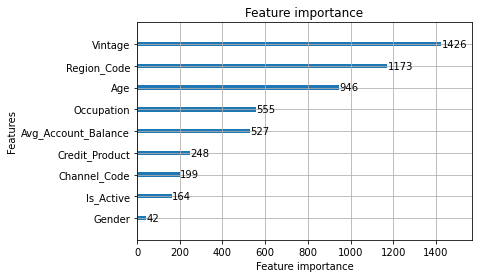

In [89]:
lightgbm.plot_importance(lgb)

# Cross validation XGB

In [142]:

fold = StratifiedKFold(n_splits = 5, shuffle =True)

i = 1
pred = []
score_train =[]
score_test =[]

for train_index , test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    print("fold " + str(i))
    xgb= xgb.fit(X_train, y_train,eval_set=[(X_test,y_test)],eval_metric='auc',verbose=50,early_stopping_rounds= 50)
    y_pred = xgb.predict_proba(X_test)[:,1]
    y_pred_train = xgb.predict_proba(X_train)[:,1]
    score_test.append(roc_auc_score( y_test,y_pred))
    score_train.append(roc_auc_score( y_train,y_pred_train))
    i+=1
    
print('Test ROC :',np.mean(score_test))
print('Train ROC :',np.mean(score_train))

fold 1
[0]	validation_0-auc:0.86466
[50]	validation_0-auc:0.87432
[100]	validation_0-auc:0.87457
[150]	validation_0-auc:0.87459
[169]	validation_0-auc:0.87468
fold 2
[0]	validation_0-auc:0.86590
[50]	validation_0-auc:0.87545
[100]	validation_0-auc:0.87617
[150]	validation_0-auc:0.87634
[200]	validation_0-auc:0.87637
[211]	validation_0-auc:0.87639
fold 3
[0]	validation_0-auc:0.86209
[50]	validation_0-auc:0.87126
[100]	validation_0-auc:0.87174
[150]	validation_0-auc:0.87186
[200]	validation_0-auc:0.87210
[250]	validation_0-auc:0.87230
[300]	validation_0-auc:0.87241
[350]	validation_0-auc:0.87240
[388]	validation_0-auc:0.87236
fold 4
[0]	validation_0-auc:0.86373
[50]	validation_0-auc:0.87387
[100]	validation_0-auc:0.87398
[150]	validation_0-auc:0.87394
[175]	validation_0-auc:0.87401
fold 5
[0]	validation_0-auc:0.86145
[50]	validation_0-auc:0.87095
[100]	validation_0-auc:0.87129
[150]	validation_0-auc:0.87153
[200]	validation_0-auc:0.87191
[250]	validation_0-auc:0.87194
[300]	validation_0-

In [143]:
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Gender_fe',
       'Credit_Product_fe', 'Region_Code_fe', 'Occupation_fe',
       'Channel_Code_fe', 'Is_Active_fe'],
      dtype='object')

# Final training 

In [144]:
xgb= xgb.fit(X, y, verbose=1)
xgb_pred = xgb.predict_proba(test[cols])[:,1]

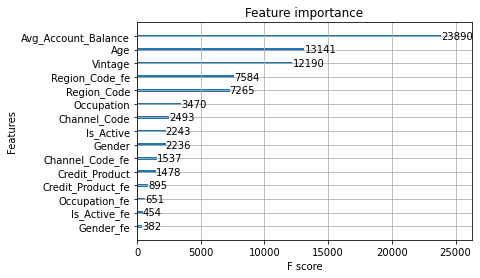

In [145]:
plot_importance(xgb)

In [129]:
lgb= lgb.fit(X, y,eval_metric='auc',categorical_feature=cat_col,verbose=1)
lgbm_pred = lgb.predict_proba(test[cols])[:,1]

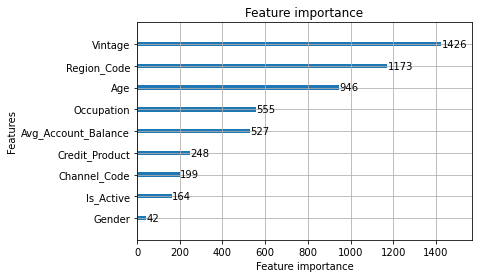

In [146]:
lightgbm.plot_importance(lgb)

# Submission

In [147]:
final = (xgb_pred*0.8)+(lgbm_pred*0.2)

In [148]:
sample['Is_Lead'] = final 
sample.to_csv('sub.csv', index=False)
sample.head()

,ID,Is_Lead
0,VBENBARO,0.047150
1,CCMEWNKY,0.906452
2,VK3KGA9M,0.085587
3,TT8RPZVC,0.030772
4,SHQZEYTZ,0.032629


In [149]:
sample

,ID,Is_Lead
0,VBENBARO,0.047150
1,CCMEWNKY,0.906452
2,VK3KGA9M,0.085587
3,TT8RPZVC,0.030772
4,SHQZEYTZ,0.032629
...,...,...
105307,DBENJOYI,0.985631
105308,CWQ72DWS,0.616529
105309,HDESC8GU,0.110204
105310,2PW4SFCA,0.298594
